In [1]:
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
import matplotlib.pyplot as plt
from datetime import datetime 

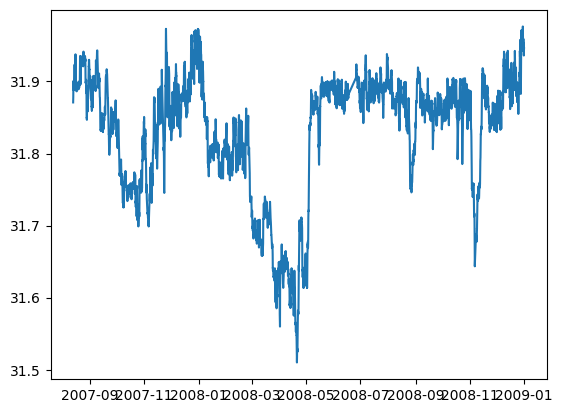

In [3]:
df = pd.read_csv ('../gpr-test.csv')
df['date-obj']=pd.to_datetime(df['timestamp'])
plt.plot(df['date-obj'], df['location-long'], label='Longitude')

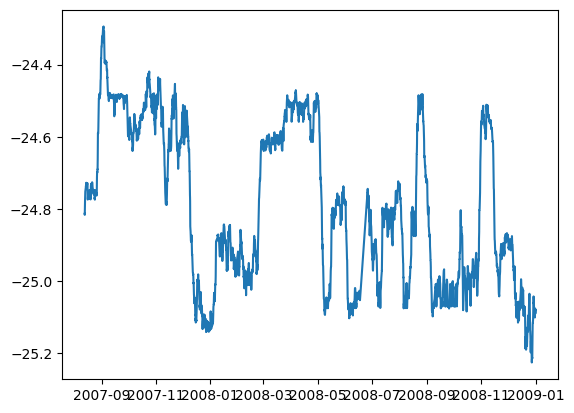

In [4]:
plt.plot(df['date-obj'], df['location-lat'], label='Latitude')

In [5]:
first_date = df['date-obj'].iloc[0]
df["delta"] = df['date-obj']-first_date
df["delta"] = df["delta"].dt.total_seconds().div(60).astype(int)

In [6]:
df2 = df.iloc[0:2000:2]
df2.index
test = df.loc[~df.index.isin(df2.index)][0:1000]

In [7]:
Xs_train = df2['delta'].to_numpy().reshape(-1,1)
ys_train = df2['location-long'].to_numpy().reshape(-1, 1)
Xs_test  = test['delta'].to_numpy().reshape(-1,1)
ys_test  = test['location-long'].to_numpy().reshape(-1,1)

C:\research\wildlife\ee\pythonProject\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


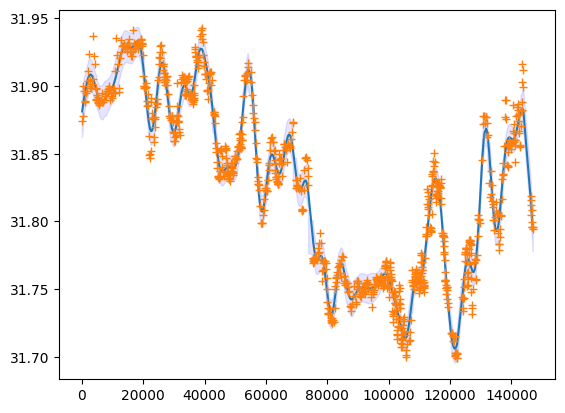

In [8]:
kernel = 1 * RBF(length_scale=1) + WhiteKernel()
my_gp = GaussianProcessRegressor(
    kernel=kernel,
    normalize_y=True,
    n_restarts_optimizer=10,
    alpha=.1
)    
my_gp.fit(Xs_train, ys_train)
y_hat_lng, y_var = my_gp.predict(Xs_test, return_std=True)
plt.plot(Xs_test, y_hat_lng) 
plt.plot(Xs_test, ys_test, '+') 

upper_bound = y_hat_lng + 1.96 * y_var
lower_bound = y_hat_lng - 1.96 * y_var
plt.fill_between(df2['delta'], lower_bound, upper_bound, color = 'b', alpha = 0.1,
                 label='95% confidence interval')

C:\research\wildlife\ee\pythonProject\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


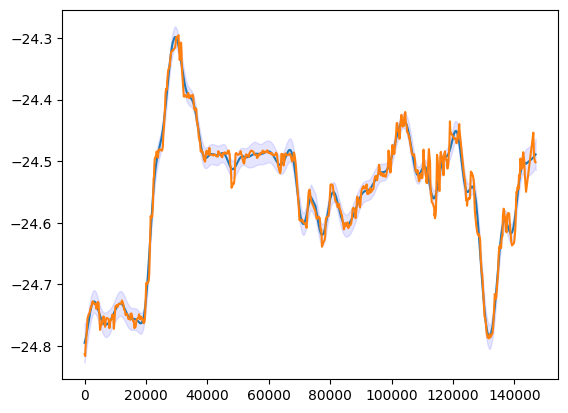

In [9]:
kernel = 1 * RBF(length_scale=1) + WhiteKernel()
my_gp = GaussianProcessRegressor(
    kernel=kernel,
    normalize_y=True,
    n_restarts_optimizer=10,
    alpha=.1
)    
my_gp.fit(df2['delta'].to_numpy().reshape(-1,1),df2['location-lat'].to_numpy().reshape(-1, 1))
y_hat_lat, y_var = my_gp.predict(df2['delta'].to_numpy().reshape(-1,1),return_std=True)
plt.plot(df2['delta'], y_hat_lat) 
plt.plot(df2['delta'], df2['location-lat'].to_numpy().reshape(-1, 1)) 

upper_bound = y_hat_lat + 1.96 * y_var
lower_bound = y_hat_lat - 1.96 * y_var
plt.fill_between(df2['delta'], lower_bound, upper_bound, color = 'b', alpha = 0.1,
                 label='95% confidence interval')

In [10]:
len(df2['location-long'].to_numpy())

1000

In [11]:
from geopy.distance import geodesic as GD

In [11]:
actual = list(zip(df2['location-lat'].to_numpy(), df2['location-long'].to_numpy()))
pred = list(zip(y_hat_lat, y_hat_lng))

#x = actual[0]
#y = pred[0]
#GD(x, y).km

NameError: name 'y_hat_lat' is not defined

In [ ]:
dist = []
for i in range(len(actual)):
    dist.append( GD(actual[i], pred[i]).km )

In [ ]:
plt.plot(df2['delta'], dist, label='Distance (KM)')

In [ ]:
list(actual)